In [37]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import os, sys, random
import pickle as pkl
from os.path import exists, join

sys.path.append('../dependencies/')

import tol_colors as tc

# Figure dir
figDir = os.path.join(os.getcwd(), 'figures_output')
if not os.path.isdir(figDir):
    os.makedirs(figDir)

# Define the target directory
targDir = "C:\OneDrive\KwanLab\Lightsheet_cFos_Pipeline\\1.scaled_Output\\"

# Define a list of substrings to filter directories
tagList = ['data=count_norm-', 'PowerTrans_RobScal_fSel_BorFS_clf_LogReg(multinom)_CV100']
# tagList = ['data=count_norm-', 'PowerTrans_RobScal_fSel_SelectKBest(k=30)_clf_LogReg(multinom)_CV100']


# Call the function and get the list of paths based on the tagList
score_dict_paths = []

# Walk through the directory and its subdirectories
for root, dirs, files in os.walk(targDir):
    # Check if 'scoreDict.pkl' is present in the files
    if 'scoreDict_Real.pkl' in files:
        if all(tag in root for tag in tagList):
            score_dict_paths.append(os.path.join(root, 'scoreDict_Real.pkl'))

# Each directory name will be used to generate a label, based on the sequence between the strings in the directory name below
startStr = 'count_norm-'
endStr = '\PowerTrans'
aucScores, meanScores, aucScrambleScores, meanScrambleScores, scoreNames  = [], [], [], [], []

# Print the result
print(f"Found 'scoreDict.pkl' files in directories containing {tagList}:")
for path in score_dict_paths:
    print(path)

    # Load the scoreDict.pkl file and extract desired accuracy.
    with open(path, 'rb') as f:                 
        featureDict = pkl.load(f)

        meanScores.append(np.mean(featureDict['scores']))
        aucScores.append(featureDict['auc']['Mean'])


    # Load the scrambled dicts
    scramblePath = path.replace('_Real', '_Shuffle')
    with open(scramblePath, 'rb') as f:                 
        featureDict = pkl.load(f)

        meanScrambleScores.append(np.mean(featureDict['scores']))
        aucScrambleScores.append(featureDict['auc']['Mean'])

    # Extract the label for the entry
    start_index = path.find(startStr)
    end_index = path.find(endStr)
    # scoreNames.append(path[start_index + len(startStr):end_index] if start_index != -1 and end_index != -1 else None)
    scoreNames.append(featureDict['compLabel'])

Found 'scoreDict.pkl' files in directories containing ['data=count_norm-', 'PowerTrans_RobScal_fSel_BorFS_clf_LogReg(multinom)_CV100']:
C:\OneDrive\KwanLab\Lightsheet_cFos_Pipeline\1.scaled_Output\classif\data=count_norm-5HT2A\PowerTrans_RobScal_fSel_BorFS_clf_LogReg(multinom)_CV100\scoreDict_Real.pkl
C:\OneDrive\KwanLab\Lightsheet_cFos_Pipeline\1.scaled_Output\classif\data=count_norm-5HTR\PowerTrans_RobScal_fSel_BorFS_clf_LogReg(multinom)_CV100\scoreDict_Real.pkl
C:\OneDrive\KwanLab\Lightsheet_cFos_Pipeline\1.scaled_Output\classif\data=count_norm-DT\PowerTrans_RobScal_fSel_BorFS_clf_LogReg(multinom)_CV100\scoreDict_Real.pkl
C:\OneDrive\KwanLab\Lightsheet_cFos_Pipeline\1.scaled_Output\classif\data=count_norm-PsiDF\PowerTrans_RobScal_fSel_BorFS_clf_LogReg(multinom)_CV100\scoreDict_Real.pkl
C:\OneDrive\KwanLab\Lightsheet_cFos_Pipeline\1.scaled_Output\classif\data=count_norm-PsiDMT\PowerTrans_RobScal_fSel_BorFS_clf_LogReg(multinom)_CV100\scoreDict_Real.pkl
C:\OneDrive\KwanLab\Lightsheet_c

In [38]:
# Modifying Score names
def replace_strings_with_dict(input_strings, translate_dict):
    replaced_strings = []

    for string in input_strings:
        for key, value in translate_dict.items():
            string = string.replace(key, value)
        replaced_strings.append(string)

    return replaced_strings

translateDict = dict()
translateDict['Ag_5HT2A'] = 'PSI/5MEO'
translateDict['Acute SSRI'] = 'A-SSRI'
translateDict['Chronic SSRI'] = 'C-SSRI'
translateDict['Psilocybin'] = 'PSI'
translateDict['Ketamine'] = 'KET'
translateDict['H_Trypt'] = 'PSI/5MEO'
translateDict['Non Halluc Trypt'] = '6-F-DET'
translateDict['6-Fluoro-DET'] = '6-F-DET'
translateDict['Entactogen'] = 'MDMA'

scoreNames = replace_strings_with_dict(scoreNames, translateDict)

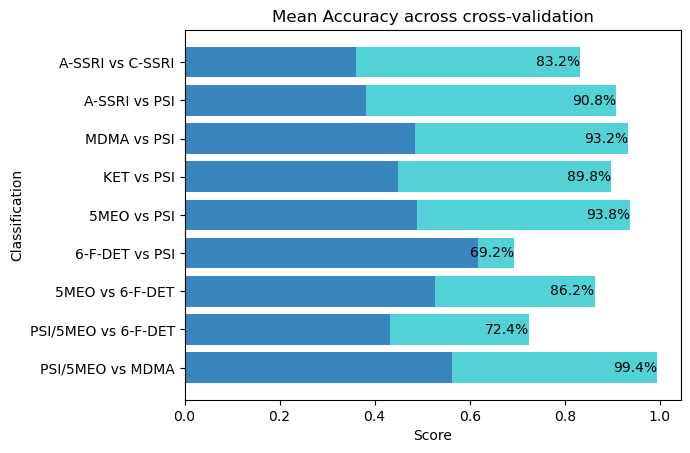

In [39]:
colorsList = [[82, 211, 216], [56, 135, 190]]
colorsList = np.array(colorsList)/256

plt.barh(scoreNames, meanScores, label='Data', color=colorsList[0])
plt.barh(scoreNames, meanScrambleScores, label='Shuffled', color=colorsList[1])
plt.title('Mean Accuracy across cross-validation')

# Set labels and title
plt.xlabel('Score')
plt.ylabel('Classification')

for index, value in enumerate(meanScores):
    percentage_text = '{:.1%}'.format(value)  # Format the value as a percentage
    plt.text(value, index, percentage_text, ha='right', va='center')

# Show the plot
plt.savefig("MeanAcc_barplot.svg", format='svg', bbox_inches='tight')     
plt.show()


In [40]:
colorsList = [[82, 211, 216], [56, 135, 190]]
colorsList = np.array(colorsList)/256
resort_Idx = [3, 2, 1, 0, 5, 8, 7, 6, 4]

scoreNames = np.array(scoreNames)[resort_Idx]
aucScores = np.array(aucScores)[resort_Idx]
aucScrambleScores = np.array(aucScrambleScores)[resort_Idx]



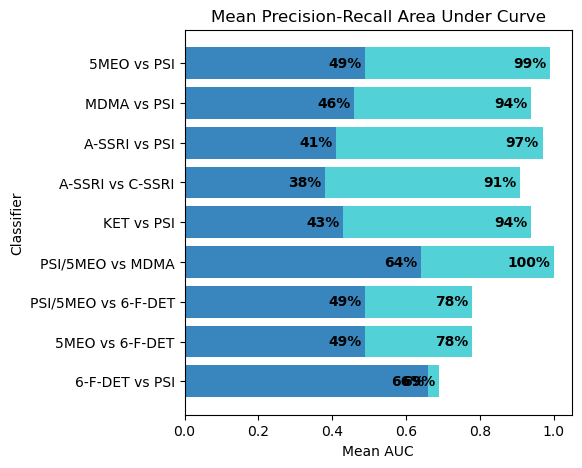

In [42]:


plt.figure(figsize=(5, 5))  # Adjust the width and height as needed
plt.barh(scoreNames, aucScores, color=colorsList[0])
plt.barh(scoreNames, aucScrambleScores, label='Shuffled', color=colorsList[1])
# plt.xlim(0.5, 1)
plt.title('Mean Precision-Recall Area Under Curve')

# Set labels and title
plt.xlabel('Mean AUC')
plt.ylabel('Classifier')

for index, value in enumerate(aucScores):
    percentage_text = '{:.0%}'.format(value)  # Format the value as a percentage
    plt.text(value-.01, index, percentage_text, ha='right', va='center', weight='bold', fontsize=10)

for index, value in enumerate(aucScrambleScores):
    percentage_text = '{:.0%}'.format(value)  # Format the value as a percentage
    plt.text(value-.01, index, percentage_text, ha='right', va='center', weight='bold', fontsize=10)

# Display the plot
plt.savefig("MeanAUC_barplot.svg", format='svg', bbox_inches='tight')     
plt.show()